In [1]:
import os,sys
Nthread = 1
os.environ["OMP_NUM_THREADS"] = str(Nthread) # export OMP_NUM_THREADS=1
os.environ["OPENBLAS_NUM_THREADS"] = str(Nthread) # export OPENBLAS_NUM_THREADS=1
os.environ["MKL_NUM_THREADS"] = str(Nthread) # export MKL_NUM_THREADS=1
os.environ["VECLIB_MAXIMUM_THREADS"] = str(Nthread) # export VECLIB_MAXIMUM_THREADS=1
os.environ["NUMEXPR_NUM_THREADS"] = str(Nthread) # export NUMEXPR_NUM_THREADS=1

import autograd.numpy as np
from autograd import grad
import nlopt, numpy as npf
import matplotlib.pyplot as plt

rpath = '/home/wljin/MyLocal/RCWA/'
sys.path.append(rpath)
sys.path.append("../") 
import use_autograd
use_autograd.use = 1
import rcwa
from utils import test_grad

In [2]:
nG = 101 # truncation order, the actual truncation order might differ from this
# frequency and angles
freq = 1.
theta = 0.
phi = 0.
# lattice vector
Lx = .5
Ly = .5
L1 = [Lx,0.]
L2 = [0.,Ly]

# now consider 4 layers: vacuum + patterned + patterned + vacuum
epsuniform0 = 1. # dielectric for layer 1 (uniform)
epsuniformN = 1.  # dielectric for layer N (uniform)

thick0 = 1. # thickness for vacuum layer 1
thickN = 1.  # thickness for vacuum layer N

###########.  patterned for optimization
# all patterned layers below have the same griding structure: Nx*Ny
Nx = 100
Ny = 100
Nlayer = 2  # number of patterned layers for optimization
ndof = Nx*Ny*Nlayer # total number of DOFs

# thickness
thickness = [0.5,0.5]
epsbkg = [1., 1.]
epsdiff = [3.,5.]

In [3]:
Qabs = 100.
def fun_reflection_dof(dof):
    freqcmp = freq*(1+1j/2/Qabs)
    obj = rcwa.RCWA_obj(nG,L1,L2,freqcmp,theta,phi,verbose=0)
    # add all layers in order
    obj.Add_LayerUniform(thick0,epsuniform0)
    for i in range(Nlayer):
        obj.Add_LayerGrid(thickness[i],epsdiff[i],epsbkg[i],Nx,Ny)
    obj.Add_LayerUniform(thick0,epsuniformN)
    
    obj.Init_Setup(Gmethod=0)

    p_amp = 1.
    p_phase = 0.
    s_amp = 0.
    s_phase = 0.
    obj.MakeExcitationPlanewave(p_amp,p_phase,s_amp,s_phase,order = 0)
    obj.GridLayer_getDOF(dof)
    R,_ = obj.RT_Solve(normalize=1)
    return R

dof = np.random.random(ndof)
fun = lambda dof: fun_reflection_dof(dof)
grad_fun = grad(fun)
test_grad(fun,grad_fun,dof,1e-4,0)

Finite difference =  5.548007026012769e-05 , Auto =  5.548018581705513e-05


In [10]:
Qabs = 100.
dof = np.random.random(ndof)
def fun_reflection_t(thickness):
    freqcmp = freq*(1+1j/2/Qabs)
    obj = rcwa.RCWA_obj(nG,L1,L2,freqcmp,theta,phi,verbose=0)
    # add all layers in order
    obj.Add_LayerUniform(thick0,epsuniform0)
    for i in range(Nlayer):
        obj.Add_LayerGrid(thickness[i],epsdiff[i],epsbkg[i],Nx,Ny)
    obj.Add_LayerUniform(thick0,epsuniformN)
    
    obj.Init_Setup(Gmethod=0)

    p_amp = 1.
    p_phase = 0.
    s_amp = 0.
    s_phase = 0.
    obj.MakeExcitationPlanewave(p_amp,p_phase,s_amp,s_phase,order = 0)
    obj.GridLayer_getDOF(dof)
    R,_ = obj.RT_Solve(normalize=1)
    return R

thickness = np.random.random(Nlayer)
fun = lambda t: fun_reflection_t(t)
grad_fun = grad(fun)
test_grad(fun,grad_fun,dof,1e-4,1)

Finite difference =  -1.1801764059610198 , Auto =  -1.1801841403341742


In [11]:
ctrl = 0
vec = []
def fun_reflection(dof,Qabs):
    freqcmp = freq*(1+1j/2/Qabs)
    obj = rcwa.RCWA_obj(nG,L1,L2,freqcmp,theta,phi,verbose=0)
    # add all layers in order
    obj.Add_LayerUniform(thick0,epsuniform0)
    for i in range(Nlayer):
        obj.Add_LayerGrid(thickness[i],epsdiff[i],epsbkg[i],Nx,Ny)
    obj.Add_LayerUniform(thick0,epsuniformN)
    
    obj.Init_Setup(Gmethod=0)

    p_amp = 1.
    p_phase = 0.
    s_amp = 0.
    s_phase = 0.
    obj.MakeExcitationPlanewave(p_amp,p_phase,s_amp,s_phase,order = 0)
    obj.GridLayer_getDOF(dof)
    R,_ = obj.RT_Solve(normalize=1)


    if 'autograd' not in str(type(R)):
        global ctrl
        global vec
        vec = npf.copy(dof)
        
        print(ctrl,R)
        if npf.mod(ctrl,10)==0:
            for i in range(Nlayer):
                plt.figure();
                plt.imshow(np.reshape(dof[i*Nx*Ny:(i+1)*Nx*Ny],(Nx,Ny)))
                plt.colorbar()
                plt.show()
            
        ctrl +=1
    return R

0 0.07216262572265215


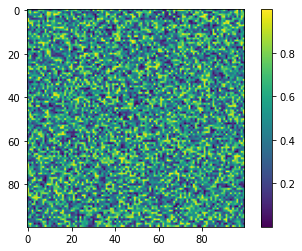

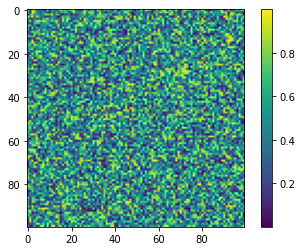

1 0.07216525874282805
2 0.07219156445554334
3 0.07256615320698447
4 0.07716806599652566
5 0.0712287284418651
6 0.08480492158991096
7 0.12979463880134043
8 0.15059538266660713
9 0.18458919991175615
10 0.1851198623252615


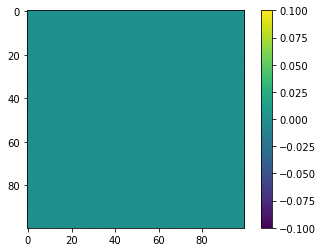

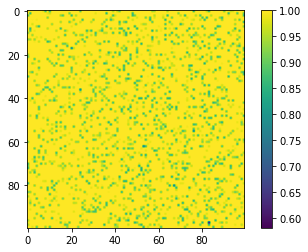

11 0.05005812167248427
12 0.08503158322421123
13 0.18637866998928962
14 0.18645736004886887
15 0.1868383476936199
16 0.18675450458820353
17 0.18740134108336368
18 0.15859638782673122
19 0.18619245045184832
20 0.18781681281508744


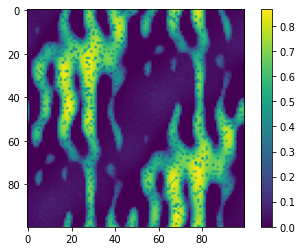

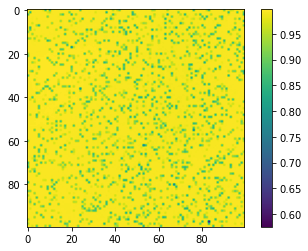

21 0.18802324831947137
22 0.1889737152219049
23 0.16906184296325275
24 0.18945190125744468
25 0.19017813809841827
26 0.13576291135576785
27 0.19102342414793408
28 0.020292322952299505
29 0.17263719208269304
30 0.19141949631124594


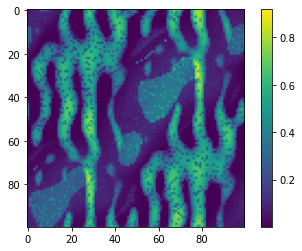

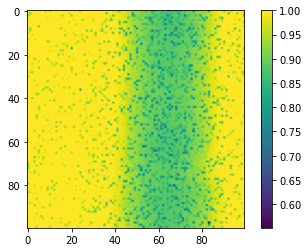

31 0.16557138445124908
32 0.1919993110150289
33 0.13021730442155827
34 0.19296244960531025
35 0.1440485797346612
36 0.19368156666934744
37 0.18332840680073983
38 0.19343090879599512
39 0.19380812443803638
40 0.19386545098704167


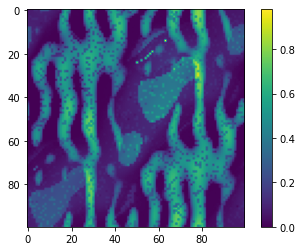

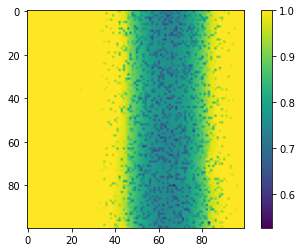

41 0.19400760591092941
42 0.19400754281335747
43 0.19410267868843575
44 0.19251595104097216
45 0.19413583673522603
46 0.1941925916125512
47 0.19422447279035016
48 0.19401906674669428
49 0.1942778917313373
50 0.18754741583689222


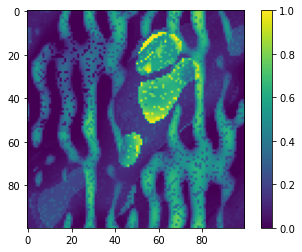

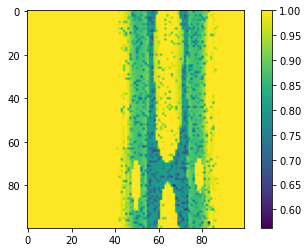

51 0.19426363277406117
52 0.1943162605039146
53 0.1931011472122551
54 0.19435298734160628
55 0.19275747885512431
56 0.1943946905752914
57 0.1910576663429449
58 0.19442761449406784
59 0.1944649156385529
60 0.1944871371943006


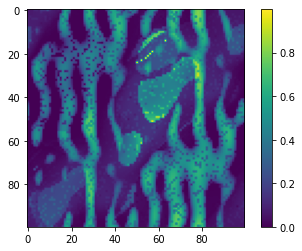

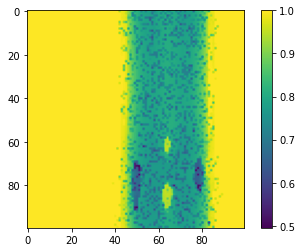

61 0.19455232533480263
62 0.19135297042784957
63 0.1946065926781245
64 0.1946285387333111
65 0.1937518842132814
66 0.19464857756347806
67 0.19465281596323025
68 0.19430544185470575
69 0.19468410401473635
70 0.19471335998002945


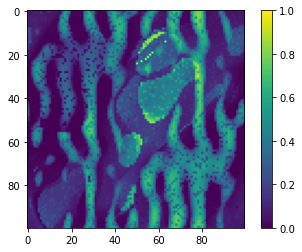

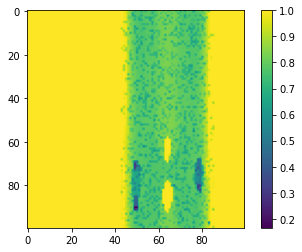

71 0.1933711607012424
72 0.19472841368049187
73 0.19413428815712608
74 0.19475207661181815
75 0.1947848484789215
76 0.19197375099072098
77 0.19478874987588615
78 0.1944037518193072
79 0.19482425116340502
80 0.1948066478604687


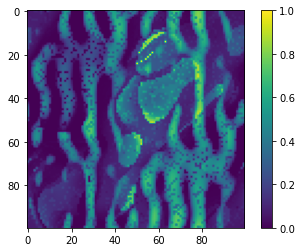

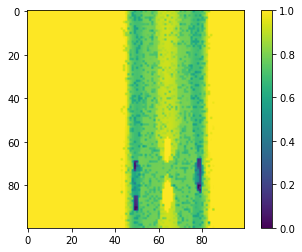

81 0.19484174563557152
82 0.18326692764236943
83 0.19481705351345455
84 0.19485155651367744
85 0.19488618317690176
86 0.17405920114136078
87 0.19429529332993942
88 0.1949004545498685
89 0.19486152295266324
90 0.19490875366426597


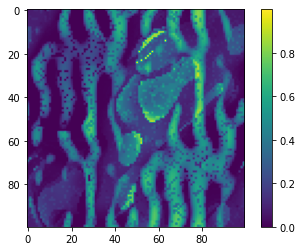

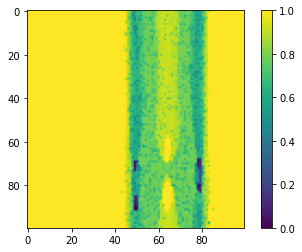

91 0.1939005952692827
92 0.19491385471032402
93 0.19491992020763943
94 0.19492623620858882
95 0.19492656516735662
96 0.19443483428147731
97 0.1949539297135567
98 0.1949079258984456
99 0.1949589414874612


In [12]:
Qabs = 20.
fun = lambda dof: fun_reflection(dof,Qabs)
grad_fun = grad(fun)
def fun_nlopt(dof,gradn):
    gradn[:] = grad_fun(dof)
    return fun(dof)

init = np.random.random(ndof)
lb=np.zeros(ndof,dtype=float)
ub=np.ones(ndof,dtype=float)

opt = nlopt.opt(nlopt.LD_MMA, ndof)
opt.set_lower_bounds(lb)
opt.set_upper_bounds(ub)

opt.set_xtol_rel(1e-5)
opt.set_maxeval(100)

opt.set_max_objective(fun_nlopt)
x = opt.optimize(init)